In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Titanic analysis

submmited by Daniel Wurms  
ID - 205681760  
Kaggle link - https://www.kaggle.com/danielwurms  

# Background
Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City.
Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time the deadliest of a single ship in the West and the deadliest peacetime sinking of a superliner or cruise ship to date.
![Titanic image](https://www.history.com/.image/c_limit%2Ccs_srgb%2Cfl_progressive%2Ch_2000%2Cq_auto:good%2Cw_2000/MTU3ODc5MDg2Njk4ODAwNDU3/rms-sailing-from-southampton.jpg)





# Defining the problem

> 1. One of the main reasons that have caused so many deaths, is the lack of lifeboats
> 2. Most of the survivals belonged to the upper class
> 3. Total amount of death cases is 1500 of the 2224 passengers that were on board, which is 68% deaths

We are going to check if it is possible to predict if a passenger would have survived  
based on the information that gathered from the disaster. In order to do it we'll need to  
make some research in order to understand the data.

>In this competition we will need to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck  

We recieve a Data frame which is consisted of the following information:
> *survival - whether the passenger survived or not  
> *pclass - the class where each passenger lived  
> *sex - gender of the passengers  
> *Age - age of the passengers  
> *sibsp - number of siblings or spouses onboard   
> *parch - number of parents or children on board  
> *ticket - ticket number of each passenger  
> *fare - ticket costs of each passenger  
> *cabin - number of cabin where the passengers stayed  
> *embarked - port of embration   

# Variables notes
**survival** - no = 0, yes = 1  
**pclass** -  
    1st = Upper
    2nd = Middle
    3rd = Lower
**sex** - male or female  
**Age** - if less then 1 is a fraction  
**sibsp** -   
    The dataset defines family relations in this way...  
    Sibling = brother, sister, stepbrother, stepsister  
    Spouse = husband, wife (mistresses and fiancés were ignored)  

**parch**-  
    The dataset defines family relations in this way...  
    Parent = mother, father  
    Child = daughter, son, stepdaughter, stepson  
    Some children travelled only with a nanny, therefore parch=0 for them.  



In [2]:

import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neural_network
from sklearn.linear_model import SGDClassifier



# Importing the data

In order to import the data we will use Pandas packages, which is a comftarble way to work with the data.  
We will import the train data into train_df  
We will import the test data into test_df  
Lastly we will combine the data and save it in combine  

In [3]:
train_df =  pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
combine = [train_df, test_df]

Let's print the columns in order to see what features we are about to face

In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


# Numerical or Categorial ?


**Numerical features:**
> Features that their values change from sample to sample  

The numerical features are - Age, Fare, SibSp, Parch  


**Categorial features:**
>Classifying the samples into sets of similiar samples  

The categorial features are - Survived, Sex, Embarked  
We have only one ordinal feature which is - Pclass  


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Mixed data types(numerical and strings)**  
Both cabin and ticket are consisted of numbers and letters  

**Which features can contain empty fields?**   
>cabin, age and embraked features contain some null values and we will need to address it.
>cabin and age are missing Data

**Data types of the features:**  
> train_df consist 7 integer features or floats, test_df consist 6  
> totally 5 features are strings


In [8]:
train_df.info()
print('_'*50)
test_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [9]:
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Numerical features distribution:**  
> total samples number whitin train_df are 891 which is 40% of total passengers amount  
> most passengers traveled alone  
> survival rate mean is 38%  
> the older passenger paid the most  
> elders count is low  
> fare varies from 0 to 512  

In [10]:
train_df.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Richard, Mr. Emile",male,347082,B96 B98,S
freq,1,577,7,4,644


**Distribution of categorial features:**  
> males are the majority onboard, about 65%  
> names are unique  
> cabins are not necessarily unique(a cabin can be shared)  
> most frequent embraked value is S  
> ticket has a lot of duplicates  



Lets try and see if there is any correlation between the features

# Basic assumptions

**Correlating:**  
we want to check which features correlate with with survival  
  
**Completing data:**  
we may need to complete age and embraked features, which may both correlate with survival  

**Fixing the data frame:**  
> ticket has many duplicates therefore we may need to drop it  
> cabin feature has many null values within it, we may need to drop it  
> name and passengerID may be dropped as well because they may not contribute with survival chances  
  
**Feature creating:**  
> it is possible that we will want to create a new feature which is family related  
> we may want to extract the title of each passenger   
> we may want to create age range fields  
> we may want to create fare range fields  

**Assumptions:**  
> 1. is survival has a strong correlation with survival ?  
> 2. children has better survival chances, in what range ?   
> 3. the rich had better surviving chances

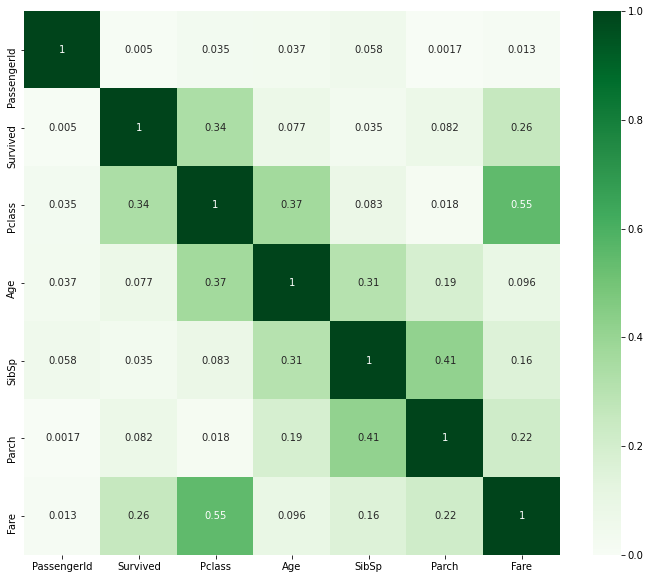

In [11]:
plt.figure(figsize=(12,10))
cor = np.abs(train_df.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens, vmin=0, vmax=1)
plt.show()

**Correlation**  
There is a problem correlationg categorial and numeral features,  
therefore we will need to make some changes in the data frames

In [12]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
women = train_df.loc[train_df.Sex == 'female']["Survived"]
women_rate = sum(women)/len(women)
men = train_df.loc[train_df.Sex == 'male']["Survived"]
men_rate = sum(men)/len(men)
print("Precentage of survived women", women_rate*100,'\n', "Precentage of men survived", men_rate*100)

Precentage of survived women 74.20382165605095 
 Precentage of men survived 18.890814558058924



we can see there is a strong relation between sex and survival chances  
**74%** of the women on the ship survived  
while only **18.9%** of the man on board survived

now lets present the rate of sex survival chances in a graph  
it is obvious that **females** had better chacnes to survive

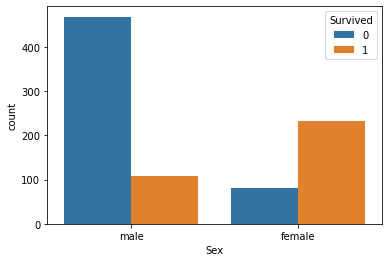

In [14]:
sns.countplot(x='Sex', hue= 'Survived',data=train_df)


# Sex related observations
 Females had better survival chances as we first suspected  
 

In [15]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


**Sibsp** presents the number of siblings or spuses on board  
we can see that a person with a bigger amount of siblings  
or spouses had lower survival chances  

In [16]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**Parch** field represents the number of parents or children aborad 

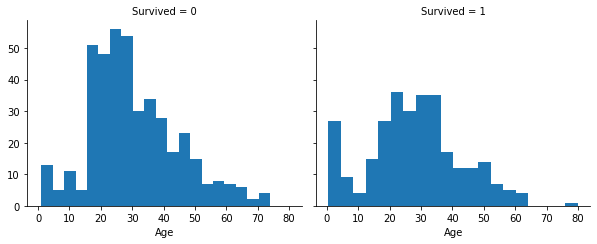

In [17]:
g = sns.FacetGrid(train_df, col='Survived',height=3.5, aspect=1.2)
g.map(plt.hist, 'Age', bins=20)

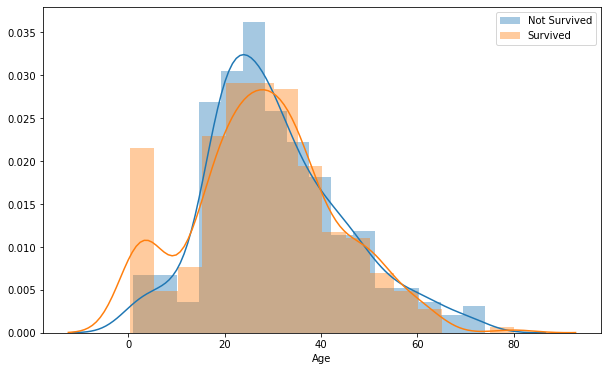

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10,6))

sns.distplot(train_df['Age'][(train_df['Age'].notnull())&(train_df['Survived']==0)] , ax=ax )
sns.distplot(train_df['Age'][(train_df['Age'].notnull())&(train_df['Survived']==1)] , ax=ax )

plt.legend(['Not Survived', 'Survived'])

# Age related observations
> Infants had a good survival chance
> There are a lot of death cases in the age range of 16-25
> The older passenger survived
> Most death cases are within the range of 16 - 40  

**Decisions:**  
> complete the null age fields  
> create age gropus  
> consider age in our model  

In [19]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
first_cl = train_df.loc[train_df.Pclass == 1]['Survived']
first_cl_sur_rate = sum(first_cl)/len(first_cl)
second_cl=train_df.loc[train_df.Pclass == 2]['Survived']
second_cl_sur_rate = sum(second_cl)/len(second_cl)
third_cl = train_df.loc[train_df.Pclass == 3]['Survived']
third_cl_sur_rate = sum(third_cl)/len(third_cl)
print("First class survival rate" ,first_cl_sur_rate*100,'\n',"Second class survival rate",second_cl_sur_rate*100,'\n',"Third class survival rate",third_cl_sur_rate*100)

First class survival rate 62.96296296296296 
 Second class survival rate 47.28260869565217 
 Third class survival rate 24.236252545824847


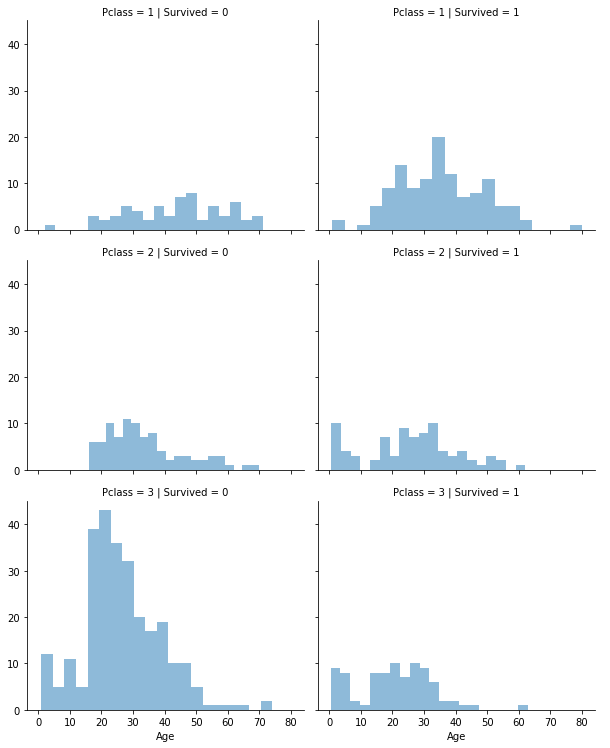

In [21]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass',height=3.5, aspect=1.2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Class related observations
we can see that there is a strong connection between class and survival chances
> 1.  **62.9%** of the passengers in first class survived  
> 2.  **47.2%** of the passengers in second class survived  
> 3.  **24.2%** of the passengers in third class survived  

we can see that the richer a person was the better survival chance he had  

**Decisions:**  
> consider class for modeling 

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


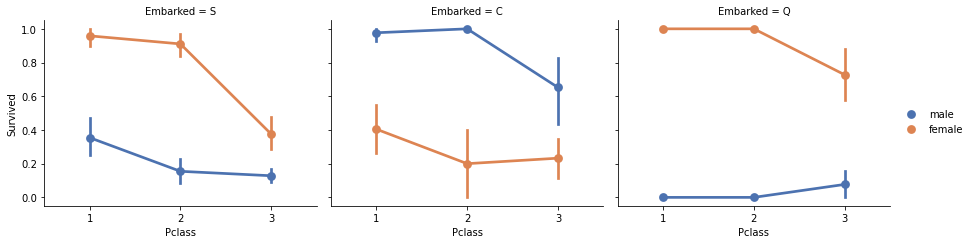

In [22]:
grid = sns.FacetGrid(train_df, col='Embarked',height=3.5, aspect=1.2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

# Embarked observations
There is an exception in C - females in C had worse survival chance comparing to females embraked from Q and S
Generaly speaking,female passengers had better survival chances  

**Decisions:**  
> add sex feature to training  
> complete the missing embraked fields  



/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


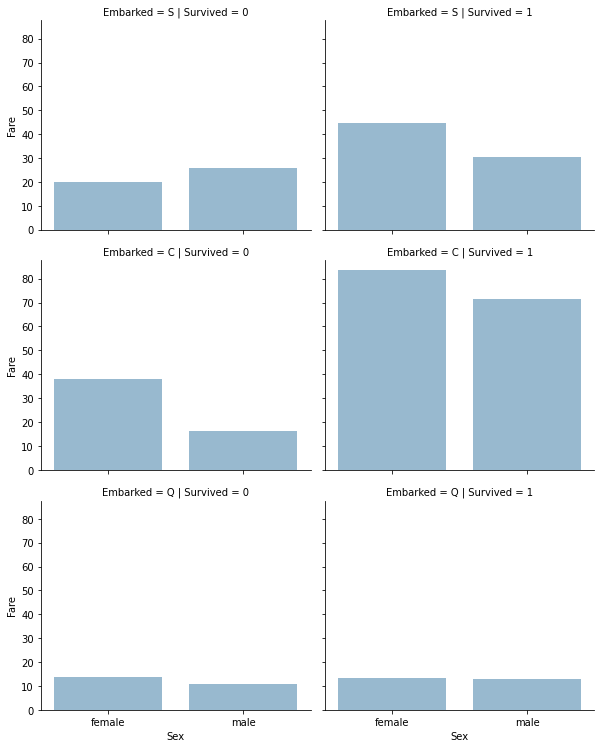

In [23]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived',height=3.5, aspect=1.2)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

# Fare related observations
In general higher fare costs caused better survival chances  
We can see that there is a certain correlation between embarked and survival  

**Decisions:**  
> consider creating fare groups  


# Fixing the data 


 **Dropping Ticket and Cabin**  
According to the observations we should drop these columns 

In [24]:


train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]



 **Adding Title feature**  
We will extract the title of each person using Regex



In [25]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


certain titles we can unite into one field called Rare

In [26]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


# Observations
Plotting the title feature shows-
* There are some differences between the different titles and the survival chances
* Master(nobels children), Miss and Mrs had the best survival chances 
* Most of Mr titled passenges did not survive

Lets convert the categorial feature Title into ordinal feature  
giving each Title a number varies from 1 to 5

In [27]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Now lets drop Name and Passenger ID from both the train data frame and the test data frame

In [28]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

**Converting categorial string features**  
First we will convert Sex feature into binary feature-  
>Male = 0  
>Female = 1  

In [29]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


**Filling empty values**    

According to our observations we can see there is a correlation between Age, Gender, and Pclass.  
Therefore we will guess Age values according to the median values for Age within  
Gender and Pclass.  


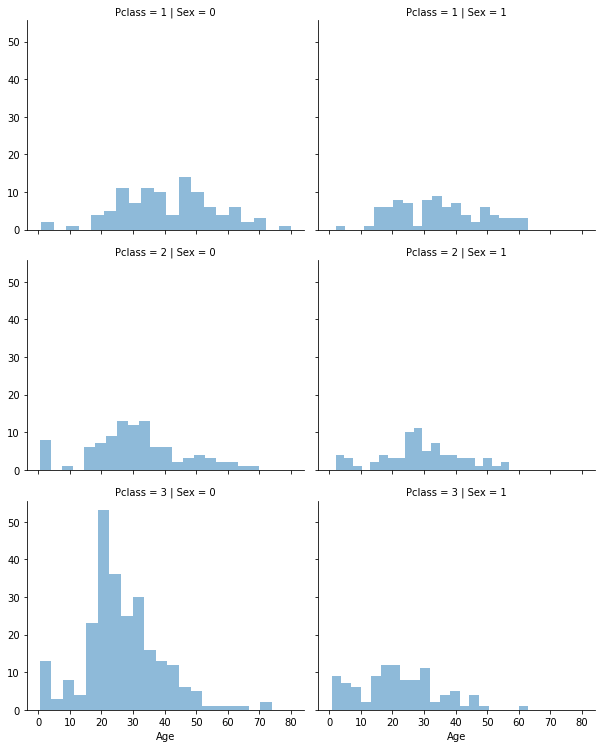

In [30]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex',height=3.5, aspect=1.2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

We will make an empty matrix that will contain the age values according to each category 

In [31]:
med_age_values = np.zeros((2,3))
med_age_values

array([[0., 0., 0.],
       [0., 0., 0.]])

In [32]:
for data_set in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = data_set[(data_set['Sex'] == i) & \
                                  (data_set['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()

            # normalizing random age values to the closest 0.5 value
            med_age_values[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            data_set.loc[ (data_set.Age.isnull()) & (data_set.Sex == i) & (data_set.Pclass == j+1),\
                    'Age'] = med_age_values[i,j]

    data_set['Age'] = data_set['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Now lets combine age values into groups and insert them into Age_group column

In [33]:
train_df['Age_group'] = pd.cut(train_df['Age'], 5)
train_df[['Age_group', 'Survived']].groupby(['Age_group'], as_index=False).mean().sort_values(by='Age_group', ascending=True)

,Age_group,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Now we will change the age values in our data frame with the our new age groups

In [34]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_group
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


Now lets remove the Age_group field

In [35]:
train_df = train_df.drop(['Age_group'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


**Combining family features**  

We will create a new feature which will be consisted of the SibSp and Parch features, the new feautre will be named Family_Size  
and after we will drop the Family_Size, SibSp and Parch in order to create a new feature that will say if the passenger is  
traveling alone or not, the feature name will be Is_Alone

In [36]:
for dataset in combine:
    dataset['Family_Size'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['Family_Size', 'Survived']].groupby(['Family_Size'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family_Size,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Is_Alone creation 

In [37]:
for dataset in combine:
    dataset['Is_Alone'] = 0
    dataset.loc[dataset['Family_Size'] == 1, 'Is_Alone'] = 1

train_df[['Is_Alone', 'Survived']].groupby(['Is_Alone'], as_index=False).mean()

,Is_Alone,Survived
0,0,0.505650
1,1,0.303538


let's drop Family_Size, SipSp and Parch from both our train data frame and our test data frame

In [38]:
train_df = train_df.drop(['Parch', 'SibSp', 'Family_Size'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'Family_Size'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Is_Alone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


Now lets create an artificial feature that will combine Pclass and Age, names Age_X_class

In [39]:
for dataset in combine:
    dataset['Age_X_class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age_X_class', 'Age', 'Pclass']].head(10)

,Age_X_class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


**Completing Embarked feature**  
As we saw before Embarkd value has two missing values,  
we will complete them by finding the most common Embraked value

In [40]:
most_common_port = train_df.Embarked.dropna().mode()[0]
most_common_port

'S'

In [41]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(most_common_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


**Converting Embarked to numerical**  
Now lets convert Embarked into numeral values:  
S = 0  
C = 1  
Q = 2  

In [42]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Is_Alone,Age_X_class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


**Completing and converting Fare**  
As we saw before Fare has one missing value,  
we will complete this value by doing the as we treated Embarked   
by making the missing value equal to the most common Fare value

In [43]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Is_Alone,Age_X_class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [44]:
train_df['Fare_Groups'] = pd.qcut(train_df['Fare'], 4)
train_df[['Fare_Groups', 'Survived']].groupby(['Fare_Groups'], as_index=False).mean().sort_values(by='Fare_Groups', ascending=True)

,Fare_Groups,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Converting Fare values into the grouped values  
and dropping Fare_Groups feature

In [45]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['Fare_Groups'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Is_Alone,Age_X_class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


Lets present the test data frame

In [46]:
test_df.head(10)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Is_Alone,Age_X_class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


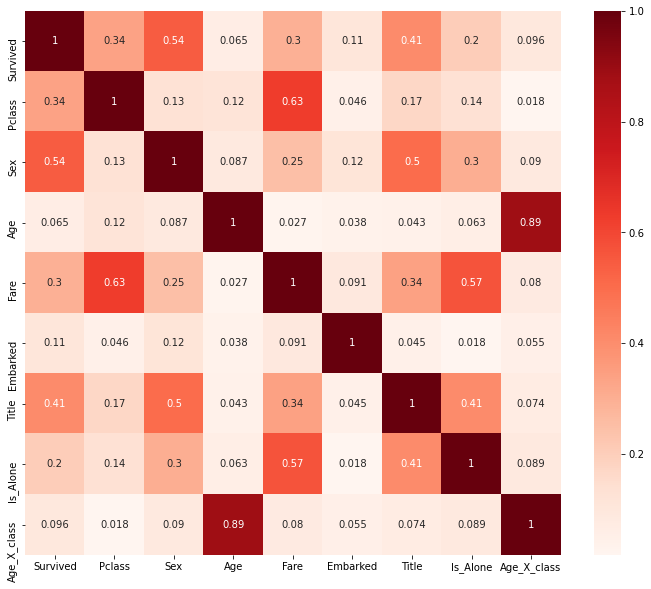

In [47]:
plt.figure(figsize=(12,10))
cor = np.abs(train_df.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Second correlation**  
Now after fixing our data we can look at the heat map  
and see the correlation between the different features

# Making predictions
We will split the data to 80% train and 20% test

# Neural Network

In [48]:
train_df_cp = train_df.copy()


In [49]:
 
t = train_df['Survived']
X = train_df.drop('Survived', axis=1)
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(X, t, test_size=0.2, random_state=2)



t_cp = train_df_cp['Survived']
X_cp = train_df_cp.drop('Survived', axis=1)
X_train_cp, X_test_cp, t_train_cp, t_test_cp = sklearn.model_selection.train_test_split(X_cp, t_cp, test_size=0.2, random_state=2)




In [50]:
MLP_cls = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=10000).fit(X_train, t_train)
y_train_prob = MLP_cls.predict_proba(X_train)
y_test_prob = MLP_cls.predict_proba(X_test)
print('Accuracy score on train', MLP_cls.score(X_train, t_train)*100)
print('Accuracy score on test', MLP_cls.score(X_test, t_test)*100)
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 78.08988764044943
Accuracy score on test 72.62569832402235

CE on train 0.4853920115667626
CE on test 0.5671633697145103


Now let's check the results of the data frame with the additional feature



In [51]:
MLP_cls_cp = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=10000).fit(X_train_cp, t_train_cp)
y_train_prob_cp = MLP_cls_cp.predict_proba(X_train_cp)
y_test_prob_cp = MLP_cls_cp.predict_proba(X_test_cp)
print('Accuracy score on train', MLP_cls_cp.score(X_train_cp, t_train_cp)*100)
print('Accuracy score on test', MLP_cls_cp.score(X_test_cp, t_test_cp)*100)
print()
print('CE on train', metrics.log_loss(t_train_cp, y_train_prob_cp))
print('CE on test', metrics.log_loss(t_test_cp, y_test_prob_cp))

Accuracy score on train 77.52808988764045
Accuracy score on test 72.62569832402235

CE on train 0.4856568576115891
CE on test 0.5636266642352


# SGD algorithm

In [52]:
# create the SGDClassifier and predict the probabilities of the train and test data
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train, t_train)
y_train_prob = SGD_cls.predict_proba(X_train)
y_test_prob = SGD_cls.predict_proba(X_test)
y_train = SGD_cls.predict(X_train)
y_test = SGD_cls.predict(X_test)
print('first 5 probabilities of y_train_prob:')
print(y_train_prob[:5])
print()
print('first 5 predictions of y_train:')
print(y_train[:5])
print()
print('first 5 probabilities of y_test_prob:')
print(y_test_prob[:5])
print()
print('first 5 predictions of y_test:')
print(y_test[:5])

first 5 probabilities of y_train_prob:
[[0.20460605 0.79539395]
 [0.47203757 0.52796243]
 [0.94767646 0.05232354]
 [0.78535708 0.21464292]
 [0.93534538 0.06465462]]

first 5 predictions of y_train:
[1 1 0 0 0]

first 5 probabilities of y_test_prob:
[[0.64717847 0.35282153]
 [0.93534538 0.06465462]
 [0.28117088 0.71882912]
 [0.94463446 0.05536554]
 [0.50756238 0.49243762]]

first 5 predictions of y_test:
[0 0 1 0 0]


In [53]:
# print the accuracy score and CE loss of the train and test
Accuracy_score_on_train = SGD_cls.score(X_train, t_train)*100
Accuracy_score_on_test = SGD_cls.score(X_test, t_test)*100
print('Accuracy score on train', Accuracy_score_on_train)
print('Accuracy score on test', Accuracy_score_on_test)
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 80.75842696629213
Accuracy score on test 77.6536312849162

CE on train 0.4283465952826703
CE on test 0.5473273055572829


In [54]:
print(Accuracy_score_on_test)

77.6536312849162


In [55]:
X_train = train_df.drop('Survived', axis=1)
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [56]:
# calculate accuracy and CE loss of the new dataframe (with the additional feature) train and test 
SGD_cls_cp = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train_cp, t_train_cp)
y_train_cp = SGD_cls_cp.predict(X_train)
y_test_cp = SGD_cls_cp.predict(X_test)
print('Accuracy score on train', SGD_cls_cp.score(X_train_cp, t_train_cp)*100)
print('Accuracy score on test', SGD_cls_cp.score(X_test_cp, t_test_cp)*100)
print()
print('CE on train', metrics.log_loss(t_train_cp, y_train_prob_cp))
print('CE on test', metrics.log_loss(t_test_cp, y_test_prob_cp))

Accuracy score on train 80.47752808988764
Accuracy score on test 77.6536312849162

CE on train 0.4856568576115891
CE on test 0.5636266642352


**conclutions**  
we used two methods in order to make data predictions,  
we can see the SGD provides better results than NN does.  


In [57]:
# submission = pd.DataFrame({'PassengerId':  test_df["PassengerId"], "Survived": y_test_cp})
# submission.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

# Sources 

> https://www.kaggle.com/startupsci/titanic-data-science-solutions experienced kaggler  
> Wikipedia  
> Moodle  


# Exercise 3

In [58]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tqdm.auto import tqdm

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix


Now we will try to improve our score by using advanced tools

In [59]:
#the target
t = train_df['Survived'].copy()
X = train_df.drop(['Survived'], axis=1)
X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(X, t, test_size=0.2, random_state=2)

train_df_cp = train_df
print('-'*25,'t','-'*25)
display(t)
print('-'*25,'X','-'*25)
display(X)

------------------------- t -------------------------


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

------------------------- X -------------------------


,Pclass,Sex,Age,Fare,Embarked,Title,Is_Alone,Age_X_class
0,3,0,1,0,0,1,0,3
1,1,1,2,3,1,3,0,2
2,3,1,1,1,0,2,1,3
3,1,1,2,3,0,3,0,2
4,3,0,2,1,0,1,1,6
...,...,...,...,...,...,...,...,...
886,2,0,1,1,0,5,1,2
887,1,1,1,2,0,2,1,1
888,3,1,1,2,0,2,0,3
889,1,0,1,2,1,1,1,1


# Cross-validation

In [60]:
from tqdm.auto import tqdm

def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [61]:
def get_cv_score_and_loss(X, t, model, transformer=None, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[X.index.intersection(train_ids)]
        t_train = t.loc[t.index.intersection(train_ids)]
        X_val = X.loc[X.index.intersection(val_ids)]
        t_val = t.loc[t.index.intersection(val_ids)]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mean_squared_error(t_train, y_train)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

In [62]:
X_normalized = StandardScaler().fit_transform(X_train)
# X_test_normalized = StandardScaler().fit_transform(X_test)
arr_X_normalized = np.asarray(X_normalized)



# Ensembles

We will use two types of ensembles:   
* Bagging - We will use both NFold and Bootstrap in order to compare   
* Boosting - We will use AdaBoosting 

After getting the results we will know which ensemble produced the best score 


When bootstrap is false we choose to work with **NFolds**

In [63]:

bag_fold_model = BaggingClassifier(base_estimator=SGDClassifier(), n_estimators=20, random_state=1, bootstrap=False).fit(X_normalized, t_train)
print('bag_fold_model', bag_fold_model.score(X_normalized, t_train).mean()*100)

bag_fold_model 80.19662921348315


When bootstrap is true we choose to work with **Bootstrap bagging** 

In [64]:
bag_boot_model = BaggingClassifier(base_estimator=SGDClassifier(), n_estimators=20, random_state=1, bootstrap=True).fit(X_normalized, t_train)
print('bag_boot_model', bag_boot_model.score(X_normalized, t_train).mean()*100)

bag_boot_model 81.03932584269663


In [65]:

ada_boost_model = AdaBoostClassifier(n_estimators=100, random_state=1).fit(X_normalized, t_train)
print('ada_boost_model', ada_boost_model.score(X_normalized, t_train).mean()*100)

ada_boost_model 82.30337078651685


In our case we can see that **AdaBoosting** performed the best and produced the best score  
Now let's present the CV score and loss graphs for AdaBoostClassifier  

In [66]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_train, t_train, ada_boost_model, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

mean cv val score: 0.80
mean cv val loss 0.20
mean cv val score: 0.82
mean cv val loss 0.18


**PCA**

In [67]:
pca = PCA(n_components=2).fit(train_df_cp)
pca_train_df = pd.DataFrame(pca.transform(train_df_cp), columns=['pc1', 'pc2'])
pca_train_df

,pc1,pc2
0,-1.530830,-0.723478
1,-2.020821,1.101158
2,-1.542252,-0.605420
3,-2.022881,1.107402
4,1.604042,-1.039730
...,...,...
886,-2.450183,-0.027479
887,-3.346806,0.518207
888,-1.546261,-0.514859
889,-3.337666,0.485943


**Feature Selection**

In [68]:
# use feature selection on the data
selector = RFECV(SGDClassifier(random_state=1), cv=RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)).fit(X_normalized, t_train)
display(X.loc[:, selector.support_])

,Pclass,Sex,Age,Title,Age_X_class
0,3,0,1,1,3
1,1,1,2,3,2
2,3,1,1,2,3
3,1,1,2,3,2
4,3,0,2,1,6
...,...,...,...,...,...
886,2,0,1,5,2
887,1,1,1,2,1
888,3,1,1,2,3
889,1,0,1,1,1


# NBC

In [69]:

print('MultinomialNB score:', cross_val_score(MultinomialNB(), X_train.loc[:, selector.support_], t_train, cv=15).mean())

MultinomialNB score: 0.7792848699763595


In [70]:

model_pipe = Pipeline([('pca', 'passthrough'), ('nbc', GaussianNB())])

hyper_parameters = {'pca': [PCA()], 'pca__n_components': list(range(1, len(X.columns)-3))}

gs_model = GridSearchCV(model_pipe, hyper_parameters).fit(arr_X_normalized, t_train)
print('Accuracy score for classification:')
print('gs_model', gs_model.best_score_*100)
print('best params', gs_model.best_params_)

Accuracy score for classification:
gs_model 73.32020092583474
best params {'pca': PCA(n_components=1), 'pca__n_components': 1}


# LDA

In [71]:

print('LinearDiscriminantAnalysis score:', cross_val_score(LinearDiscriminantAnalysis(), X_train.loc[:, selector.support_], t_train, cv=15).mean()*100)

LinearDiscriminantAnalysis score: 78.7854609929078


In [72]:
model_pipe = Pipeline([('pca', 'passthrough'), ('nbc', LinearDiscriminantAnalysis())])

hyper_parameters = {'pca': [PCA()], 'pca__n_components': list(range(1, len(X.columns)-3))}

gs_model = GridSearchCV(model_pipe, hyper_parameters).fit(arr_X_normalized, t_train)
print('Accuracy score for classification:')
print('gs_model', gs_model.best_score_*100)
print('best params', gs_model.best_params_)

Accuracy score for classification:
gs_model 76.5468334482419
best params {'pca': PCA(n_components=4), 'pca__n_components': 4}


# KNN

In [73]:

hyper_parameters = {'n_neighbors': list(range(1, 25))}

gs_neigh_model_classifier = GridSearchCV(KNeighborsClassifier(n_neighbors=5), hyper_parameters).fit(arr_X_normalized, t_train)
print('gs_neigh_model', gs_neigh_model_classifier.best_score_*100)
print('best params', gs_neigh_model_classifier.best_params_)

gs_neigh_model 82.44361272530287
best params {'n_neighbors': 12}


In [74]:
hyper_parameters = {'n_neighbors': list(range(1, 25))}

gs_neigh_model = GridSearchCV(KNeighborsRegressor(n_neighbors=5, weights='distance'), hyper_parameters).fit(arr_X_normalized, t_train)
print('gs_neigh_model', gs_neigh_model.best_score_*100)
print('best params', gs_neigh_model.best_params_)

gs_neigh_model 36.3884964160989
best params {'n_neighbors': 15}


We can see there is a huge difference between the **classifier** and the **regressor** for the calssifier,  
therefore we'll go with the classifier  
**And the best neighbors number is 14**  

From all of the algorithms we can see that the best results were achieved with **KNN using the KNeighborsClassifier**,  
therefore we'll choose it  
it is stored in gs_neigh_model_classifier  


# Confusion Matrix

In [75]:
y_train = gs_neigh_model_classifier.predict(arr_X_normalized)

Let's create a Confusion Matrix of for our training data

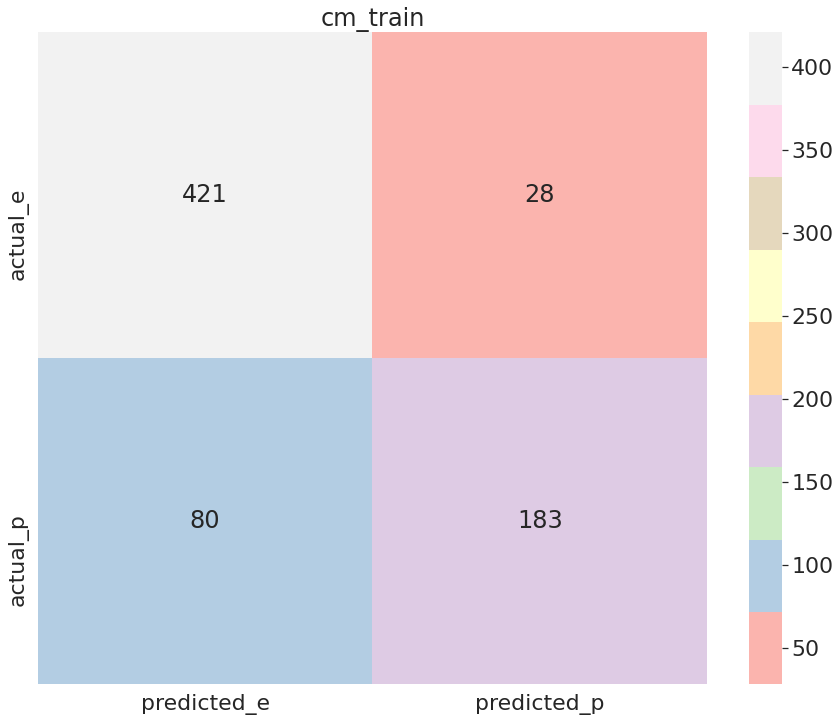

In [76]:
cm_train = confusion_matrix(t_train, y_train)

cm_train_df = pd.DataFrame(cm_train, index=['actual_e', 'actual_p'], columns=['predicted_e', 'predicted_p'])

sns.set(font_scale=2)
plt.figure(figsize = (15,12))
fig = sns.heatmap(cm_train_df, annot=True, cmap=plt.cm.Pastel1, fmt='g')
fig.set_title("cm_train")
plt.show()


Now we can present precision, recall, specificity and accuracy values

In [77]:
def precision(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fp)

def recall(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fn)

def specificity(cm):
    tn, fp, fn, tp = cm.ravel()
    return tn/(tn+fp)

def fpr(cm):
    tn, fp, fn, tp = cm.ravel()
    return fp/(fp+tn)

def accuracy(cm):
    tn, fp, fn, tp = cm.ravel()
    return (tp+tn)/(tp+tn+fp+fn)

print(f'Train: precision {precision(cm_train):.2f}, recall {recall(cm_train):.2f}, specificity {specificity(cm_train):.2f}, fpr {fpr(cm_train):.2f}, accuracy {accuracy(cm_train):.2f}')


Train: precision 0.87, recall 0.70, specificity 0.94, fpr 0.06, accuracy 0.85


We can see that:
* **Precision-** which shows the percentage of correct positive predictions out of all the positive predictions is 0.87  
* **Recall which-** shows the percentage of correct positive predictions out of all the actual positive samples is 0.70  
* **Specificity-** which shows the percentage of correct negative predictions out of all the actual negative samples is 0.94  
* **Fpr-** which shows the percentage of mistaken negative predictions out of all the actual negative samples is 0.06  
* **Accuracy-** which shows the percentage of correct predictions out of all the data is 0.85 

We conclude that our model can find very well the actual negative samples and that it's mistake rate is very low  


And lastly let's calculate the complicated KPI's

In [78]:
def f1(cm):
    precision_calc = precision(cm)
    recall_calc = recall(cm)
    return (2*precision_calc*recall_calc)/(precision_calc+recall_calc)

def balanced_accuracy(cm):
    recall_calc = recall(cm)
    specificity_calc = specificity(cm)
    return (recall_calc+specificity_calc)/2

print(f'Train: f1 {f1(cm_train):.2f}, balanced_accuracy {balanced_accuracy(cm_train):.2f}')


Train: f1 0.77, balanced_accuracy 0.82


# Predictions

Now let's make our prediction !

In [79]:

X_test  = test_df.drop("PassengerId", axis=1).copy()
X_test_normalized = StandardScaler().fit_transform(X_test)
arr_X_test_normalized = np.asarray(X_test_normalized)


In [80]:


y_train = gs_neigh_model_classifier.predict(arr_X_normalized)
y_test = gs_neigh_model_classifier.predict(arr_X_test_normalized)
print("Train score:",gs_neigh_model_classifier.score(X_normalized, t_train) * 100)



Train score: 84.8314606741573


In [81]:
submission = pd.DataFrame({'PassengerId':  test_df["PassengerId"], "Survived": y_test})
submission.to_csv('submission.csv', index=False)

In this session we tried more advanced methods but we saw that we didn't necessarily improved our score,  
the model that worked best for us was the KNN model which provieded the best score.  
**Credits:**  
Are going to the notebooks in our moodle system

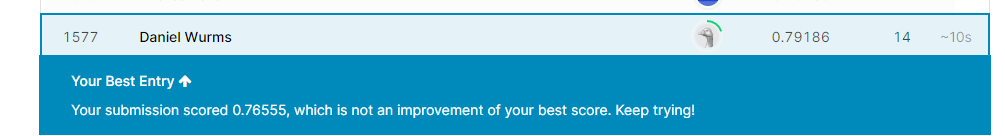

submissions


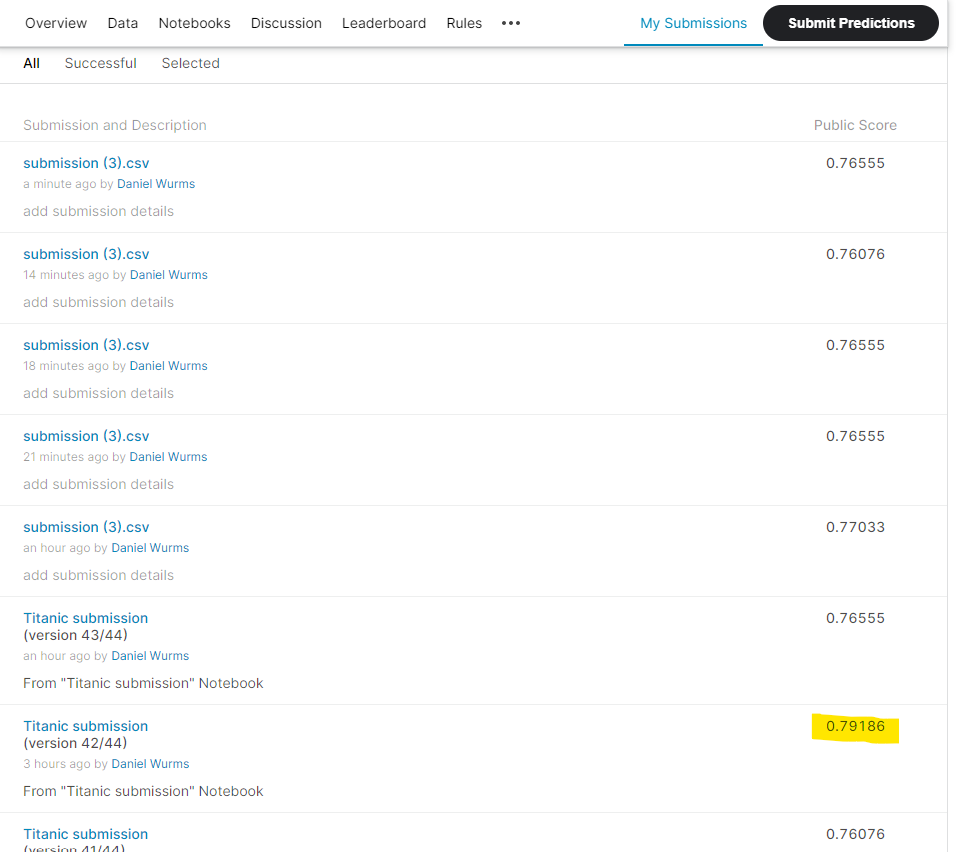